In [39]:
import pandas as pd
import numpy as np

In [40]:
df = pd.read_csv("/home/ira/round1.csv")

In [41]:
df

,Timestamp,Email address,Score,"On May 1st 2020, there are more than ... total confirmed cases (active + inactive) in Europe. [500,000]","On May 1st 2020, there are more than ... total confirmed cases (active + inactive) in Europe. [1,000,000]","On May 1st 2020, there are more than ... total confirmed cases (active + inactive) in Europe. [2,500,000]","On May 1st 2020, there are more than ... total confirmed cases (active + inactive) in Europe. [5,000,000]","On May 1st 2020, there are more than ... total confirmed cases (active + inactive) in Europe. [10,000,000]","On May 1st 2020, there are more than ... deaths in Europe. [25,000]","On May 1st 2020, there are more than ... deaths in Europe. [50,000]",...,"On May 1st 2020, there are more active cases in ... than in Europe [Africa]","On May 1st 2020, there are more active cases in ... than in Europe [Asia]","On May 1st 2020, there are more active cases in ... than in Europe [North America]","On May 1st 2020, there are more active cases in ... than in Europe [South America]","On May 1st 2020, Italy has less active cases than on April 1st 2020 [-]","On May 1st 2020, the vaccine is already deployed and more than have 50,000 received it. [-]","On May 1st 2020, there are more than ... total confirmed cases (active + inactive) in Europe. [750,000]","On May 1st 2020, there are more active cases in ... than in Europe [Oceania]","On May 1st 2020, there are more than ... deaths in Europe. [75,000]","On May 1st 2020, there are more than ... deaths in Europe. [5,000]"
0,17/03/2020 21:56:45,neltharion.zvo@gmail.com,NaN,90%,50%,25%,10%,1% (Definitely not),50%,25%,...,90%,99% (Certainly),50%,50%,50%,25%,NaN,NaN,NaN,50%
1,22/03/2020 20:48:19,natalia.pleczynska@gmail.com,NaN,90%,50%,25%,25%,25%,99% (Certainly),75%,...,1% (Definitely not),1% (Definitely not),50%,25%,90%,1% (Definitely not),NaN,NaN,NaN,99% (Certainly)
2,22/03/2020 20:52:48,marian.andrecki@gmail.com,NaN,75%,25%,10%,10%,10%,90%,50%,...,25%,75%,75%,75%,75%,10%,NaN,NaN,NaN,99% (Certainly)
3,29/03/2020 21:28:06,xramx@o2.pl,NaN,99% (Certainly),90%,50%,10%,1% (Definitely not),99% (Certainly),99% (Certainly),...,50%,75%,99% (Certainly),99% (Certainly),1% (Definitely not),1% (Definitely not),99% (Certainly),25%,99% (Certainly),NaN
4,29/03/2020 22:59:46,antigone.debbaut@gmail.com,NaN,99% (Certainly),50%,10%,10%,10%,99% (Certainly),90%,...,90%,50%,90%,75%,90%,10%,90%,25%,50%,NaN
5,30/03/2020 04:23:30,colin.m.pickup@gmail.com,NaN,99% (Certainly),90%,10%,1% (Definitely not),1% (Definitely not),99% (Certainly),99% (Certainly),...,99% (Certainly),50%,99% (Certainly),99% (Certainly),99% (Certainly),1% (Definitely not),99% (Certainly),1% (Definitely not),90%,NaN
6,30/03/2020 15:34:53,anna.mikelsone@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,99% (Certainly),25%,...,1% (Definitely not),10%,50%,25%,10%,1% (Definitely not),NaN,1% (Definitely not),10%,NaN
7,04/04/2020 20:43:23,nethopp3r@gmail.com,NaN,99% (Certainly),99% (Certainly),75%,10%,1% (Definitely not),99% (Certainly),99% (Certainly),...,1% (Definitely not),50%,90%,10%,10%,25%,99% (Certainly),1% (Definitely not),90%,NaN
8,05/04/2020 15:23:06,pmosmex@gmail.com,NaN,NaN,99% (Certainly),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,99% (Certainly),NaN,99% (Certainly),1% (Definitely not),NaN,NaN,99% (Certainly),NaN
9,07/04/2020 17:17:30,natalia.pleczynska@gmail.com,NaN,99% (Certainly),90%,90%,75%,10%,99% (Certainly),99% (Certainly),...,10%,25%,90%,10%,75%,10%,99% (Certainly),1% (Definitely not),99% (Certainly),NaN


In [44]:
ps = df.iloc[:-1, 3:-6].applymap(lambda x: float(x.split("%")[0])/100 if type(x) is str else None)

In [139]:
ps

,"On May 1st 2020, there are more than ... total confirmed cases (active + inactive) in Europe. [500,000]","On May 1st 2020, there are more than ... total confirmed cases (active + inactive) in Europe. [1,000,000]","On May 1st 2020, there are more than ... total confirmed cases (active + inactive) in Europe. [2,500,000]","On May 1st 2020, there are more than ... total confirmed cases (active + inactive) in Europe. [5,000,000]","On May 1st 2020, there are more than ... total confirmed cases (active + inactive) in Europe. [10,000,000]","On May 1st 2020, there are more than ... deaths in Europe. [25,000]","On May 1st 2020, there are more than ... deaths in Europe. [50,000]","On May 1st 2020, there are more than ... deaths in Europe. [100,000]","On May 1st 2020, there are more than ... deaths in Europe. [250,000]","On May 1st 2020, there are more than ... deaths in Europe. [500,000]","On May 1st 2020, there are more than ... active cases in Europe. [10,000]","On May 1st 2020, there are more than ... active cases in Europe. [50,000]","On May 1st 2020, there are more than ... active cases in Europe. [250,000]","On May 1st 2020, there are more than ... active cases in Europe. [1,000,000]","On May 1st 2020, there are more than ... active cases in Europe. [5,000,000]","On May 1st 2020, there are more than ... active cases in Europe. [10,000,000]","On May 1st 2020, there are more active cases in ... than in Europe [Africa]","On May 1st 2020, there are more active cases in ... than in Europe [Asia]","On May 1st 2020, there are more active cases in ... than in Europe [North America]","On May 1st 2020, there are more active cases in ... than in Europe [South America]"
0,0.90,0.50,0.25,0.10,0.01,0.50,0.25,0.10,0.01,NaN,0.50,0.75,0.25,0.10,0.01,0.01,0.90,0.99,0.50,0.50
1,0.90,0.50,0.25,0.25,0.25,0.99,0.75,0.50,0.10,0.10,0.99,0.99,0.50,0.10,0.01,0.01,0.01,0.01,0.50,0.25
2,0.75,0.25,0.10,0.10,0.10,0.90,0.50,0.10,0.10,0.10,0.99,0.75,0.50,0.10,0.10,0.01,0.25,0.75,0.75,0.75
3,0.99,0.90,0.50,0.10,0.01,0.99,0.99,0.90,0.50,0.01,0.99,0.90,0.75,0.25,0.01,0.01,0.50,0.75,0.99,0.99
4,0.99,0.50,0.10,0.10,0.10,0.99,0.90,0.25,0.25,0.10,0.75,0.25,0.10,0.01,0.01,0.01,0.90,0.50,0.90,0.75
5,0.99,0.90,0.10,0.01,0.01,0.99,0.99,0.75,0.25,0.01,0.99,0.99,0.50,0.01,0.01,0.01,0.99,0.50,0.99,0.99
6,NaN,NaN,NaN,NaN,NaN,0.99,0.25,0.01,0.01,0.01,0.99,0.99,0.99,0.10,0.01,0.01,0.01,0.10,0.50,0.25
7,0.99,0.99,0.75,0.10,0.01,0.99,0.99,0.75,0.50,0.10,0.99,0.99,0.90,0.10,0.01,0.01,0.01,0.50,0.90,0.10
8,NaN,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,NaN,NaN,NaN,0.99,NaN
9,0.99,0.90,0.90,0.75,0.10,0.99,0.99,0.90,0.75,0.50,0.99,0.99,0.90,0.75,0.25,0.25,0.10,0.25,0.90,0.10


In [63]:
target = df.iloc[-1, 3:-6].map(float)
target

On May 1st 2020, there are more than ... total confirmed cases (active + inactive) in Europe. [500,000]       1.0
On May 1st 2020, there are more than ... total confirmed cases (active + inactive) in Europe. [1,000,000]     1.0
On May 1st 2020, there are more than ... total confirmed cases (active + inactive) in Europe. [2,500,000]     0.0
On May 1st 2020, there are more than ... total confirmed cases (active + inactive) in Europe. [5,000,000]     0.0
On May 1st 2020, there are more than ... total confirmed cases (active + inactive) in Europe. [10,000,000]    0.0
On May 1st 2020, there are more than ... deaths in Europe. [25,000]                                           1.0
On May 1st 2020, there are more than ... deaths in Europe. [50,000]                                           1.0
On May 1st 2020, there are more than ... deaths in Europe. [100,000]                                          1.0
On May 1st 2020, there are more than ... deaths in Europe. [250,000]                    

In [68]:
ps_true = ps.apply(lambda x: x*target + (1-x)*(1-target) , axis=1)

In [94]:
ps_true.notna().sum(axis=1).to_frame("response_count")

,response_count
0,19
1,20
2,20
3,20
4,20
5,20
6,15
7,20
8,3
9,20


In [98]:
ps_true

,"On May 1st 2020, there are more than ... total confirmed cases (active + inactive) in Europe. [500,000]","On May 1st 2020, there are more than ... total confirmed cases (active + inactive) in Europe. [1,000,000]","On May 1st 2020, there are more than ... total confirmed cases (active + inactive) in Europe. [2,500,000]","On May 1st 2020, there are more than ... total confirmed cases (active + inactive) in Europe. [5,000,000]","On May 1st 2020, there are more than ... total confirmed cases (active + inactive) in Europe. [10,000,000]","On May 1st 2020, there are more than ... deaths in Europe. [25,000]","On May 1st 2020, there are more than ... deaths in Europe. [50,000]","On May 1st 2020, there are more than ... deaths in Europe. [100,000]","On May 1st 2020, there are more than ... deaths in Europe. [250,000]","On May 1st 2020, there are more than ... deaths in Europe. [500,000]","On May 1st 2020, there are more than ... active cases in Europe. [10,000]","On May 1st 2020, there are more than ... active cases in Europe. [50,000]","On May 1st 2020, there are more than ... active cases in Europe. [250,000]","On May 1st 2020, there are more than ... active cases in Europe. [1,000,000]","On May 1st 2020, there are more than ... active cases in Europe. [5,000,000]","On May 1st 2020, there are more than ... active cases in Europe. [10,000,000]","On May 1st 2020, there are more active cases in ... than in Europe [Africa]","On May 1st 2020, there are more active cases in ... than in Europe [Asia]","On May 1st 2020, there are more active cases in ... than in Europe [North America]","On May 1st 2020, there are more active cases in ... than in Europe [South America]"
0,0.90,0.50,0.75,0.90,0.99,0.50,0.25,0.10,0.99,NaN,0.50,0.75,0.25,0.90,0.99,0.99,0.10,0.01,0.50,0.50
1,0.90,0.50,0.75,0.75,0.75,0.99,0.75,0.50,0.90,0.90,0.99,0.99,0.50,0.90,0.99,0.99,0.99,0.99,0.50,0.75
2,0.75,0.25,0.90,0.90,0.90,0.90,0.50,0.10,0.90,0.90,0.99,0.75,0.50,0.90,0.90,0.99,0.75,0.25,0.75,0.25
3,0.99,0.90,0.50,0.90,0.99,0.99,0.99,0.90,0.50,0.99,0.99,0.90,0.75,0.75,0.99,0.99,0.50,0.25,0.99,0.01
4,0.99,0.50,0.90,0.90,0.90,0.99,0.90,0.25,0.75,0.90,0.75,0.25,0.10,0.99,0.99,0.99,0.10,0.50,0.90,0.25
5,0.99,0.90,0.90,0.99,0.99,0.99,0.99,0.75,0.75,0.99,0.99,0.99,0.50,0.99,0.99,0.99,0.01,0.50,0.99,0.01
6,NaN,NaN,NaN,NaN,NaN,0.99,0.25,0.01,0.99,0.99,0.99,0.99,0.99,0.90,0.99,0.99,0.99,0.90,0.50,0.75
7,0.99,0.99,0.25,0.90,0.99,0.99,0.99,0.75,0.50,0.90,0.99,0.99,0.90,0.90,0.99,0.99,0.99,0.50,0.90,0.90
8,NaN,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,NaN,NaN,NaN,0.99,NaN
9,0.99,0.90,0.10,0.25,0.90,0.99,0.99,0.90,0.25,0.50,0.99,0.99,0.90,0.25,0.75,0.75,0.90,0.75,0.90,0.90


In [97]:
-ps_true.applymap(np.log)

,"On May 1st 2020, there are more than ... total confirmed cases (active + inactive) in Europe. [500,000]","On May 1st 2020, there are more than ... total confirmed cases (active + inactive) in Europe. [1,000,000]","On May 1st 2020, there are more than ... total confirmed cases (active + inactive) in Europe. [2,500,000]","On May 1st 2020, there are more than ... total confirmed cases (active + inactive) in Europe. [5,000,000]","On May 1st 2020, there are more than ... total confirmed cases (active + inactive) in Europe. [10,000,000]","On May 1st 2020, there are more than ... deaths in Europe. [25,000]","On May 1st 2020, there are more than ... deaths in Europe. [50,000]","On May 1st 2020, there are more than ... deaths in Europe. [100,000]","On May 1st 2020, there are more than ... deaths in Europe. [250,000]","On May 1st 2020, there are more than ... deaths in Europe. [500,000]","On May 1st 2020, there are more than ... active cases in Europe. [10,000]","On May 1st 2020, there are more than ... active cases in Europe. [50,000]","On May 1st 2020, there are more than ... active cases in Europe. [250,000]","On May 1st 2020, there are more than ... active cases in Europe. [1,000,000]","On May 1st 2020, there are more than ... active cases in Europe. [5,000,000]","On May 1st 2020, there are more than ... active cases in Europe. [10,000,000]","On May 1st 2020, there are more active cases in ... than in Europe [Africa]","On May 1st 2020, there are more active cases in ... than in Europe [Asia]","On May 1st 2020, there are more active cases in ... than in Europe [North America]","On May 1st 2020, there are more active cases in ... than in Europe [South America]"
0,0.105361,0.693147,0.287682,0.105361,0.010050,0.693147,1.386294,2.302585,0.010050,NaN,0.693147,0.287682,1.386294,0.105361,0.010050,0.010050,2.302585,4.605170,0.693147,0.693147
1,0.105361,0.693147,0.287682,0.287682,0.287682,0.010050,0.287682,0.693147,0.105361,0.105361,0.010050,0.010050,0.693147,0.105361,0.010050,0.010050,0.010050,0.010050,0.693147,0.287682
2,0.287682,1.386294,0.105361,0.105361,0.105361,0.105361,0.693147,2.302585,0.105361,0.105361,0.010050,0.287682,0.693147,0.105361,0.105361,0.010050,0.287682,1.386294,0.287682,1.386294
3,0.010050,0.105361,0.693147,0.105361,0.010050,0.010050,0.010050,0.105361,0.693147,0.010050,0.010050,0.105361,0.287682,0.287682,0.010050,0.010050,0.693147,1.386294,0.010050,4.605170
4,0.010050,0.693147,0.105361,0.105361,0.105361,0.010050,0.105361,1.386294,0.287682,0.105361,0.287682,1.386294,2.302585,0.010050,0.010050,0.010050,2.302585,0.693147,0.105361,1.386294
5,0.010050,0.105361,0.105361,0.010050,0.010050,0.010050,0.010050,0.287682,0.287682,0.010050,0.010050,0.010050,0.693147,0.010050,0.010050,0.010050,4.605170,0.693147,0.010050,4.605170
6,NaN,NaN,NaN,NaN,NaN,0.010050,1.386294,4.605170,0.010050,0.010050,0.010050,0.010050,0.010050,0.105361,0.010050,0.010050,0.010050,0.105361,0.693147,0.287682
7,0.010050,0.010050,1.386294,0.105361,0.010050,0.010050,0.010050,0.287682,0.693147,0.105361,0.010050,0.010050,0.105361,0.105361,0.010050,0.010050,0.010050,0.693147,0.105361,0.105361
8,NaN,0.010050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010050,NaN,NaN,NaN,NaN,NaN,0.010050,NaN
9,0.010050,0.105361,2.302585,1.386294,0.105361,0.010050,0.010050,0.105361,1.386294,0.693147,0.010050,0.010050,0.105361,1.386294,0.287682,0.287682,0.105361,0.287682,0.105361,0.105361


In [140]:
cross_entropy = -ps_true.applymap(np.log).mean(axis=1).to_frame("score")


In [141]:
cross_entropy

,score
0,0.862122
1,0.235140
2,0.493074
3,0.457908
4,0.570406
5,0.575166
6,0.484898
7,0.189647
8,0.010050
9,0.440272


In [142]:
df["Email address"].iloc[:-1]

0         neltharion.zvo@gmail.com
1     natalia.pleczynska@gmail.com
2        marian.andrecki@gmail.com
3                      xramx@o2.pl
4       antigone.debbaut@gmail.com
5         colin.m.pickup@gmail.com
6         anna.mikelsone@gmail.com
7              nethopp3r@gmail.com
8                pmosmex@gmail.com
9     natalia.pleczynska@gmail.com
10       marian.andrecki@gmail.com
11             A.Marek@soton.ac.uk
12            hanna23456@gmail.com
13              neiljb6@icloud.com
Name: Email address, dtype: object

In [143]:
cross_entropy["mail"] = df["Email address"].iloc[:-1]
cross_entropy["time"] = df["Timestamp"].iloc[:-1]

cross_entropy["response_count"] = ps_true.notna().sum(axis=1)

In [144]:
cross_entropy = cross_entropy[cross_entropy["response_count"]>10]

In [147]:
cross_entropy

,score,mail,time,response_count
0,0.862122,neltharion.zvo@gmail.com,17/03/2020 21:56:45,19
1,0.235140,natalia.pleczynska@gmail.com,22/03/2020 20:48:19,20
2,0.493074,marian.andrecki@gmail.com,22/03/2020 20:52:48,20
3,0.457908,xramx@o2.pl,29/03/2020 21:28:06,20
4,0.570406,antigone.debbaut@gmail.com,29/03/2020 22:59:46,20
5,0.575166,colin.m.pickup@gmail.com,30/03/2020 04:23:30,20
6,0.484898,anna.mikelsone@gmail.com,30/03/2020 15:34:53,15
7,0.189647,nethopp3r@gmail.com,04/04/2020 20:43:23,20
9,0.440272,natalia.pleczynska@gmail.com,07/04/2020 17:17:30,20
10,0.172807,marian.andrecki@gmail.com,07/04/2020 17:19:21,20


In [148]:
leaders = {
    "scores": [],
    "mails": [],
    "times": []
}
top_score = 1000
for i, row in cross_entropy.iterrows():
    if row["score"] < top_score:
        top_score = row["score"]
        leaders["scores"].append(row["score"])
        leaders["mails"].append(row["mail"])
        leaders["times"].append(row["time"])
        

In [149]:
standings = pd.DataFrame(leaders)

In [150]:
standings

,scores,mails,times
0,0.862122,neltharion.zvo@gmail.com,17/03/2020 21:56:45
1,0.235140,natalia.pleczynska@gmail.com,22/03/2020 20:48:19
2,0.189647,nethopp3r@gmail.com,04/04/2020 20:43:23
3,0.172807,marian.andrecki@gmail.com,07/04/2020 17:19:21
4,0.170585,A.Marek@soton.ac.uk,08/04/2020 08:57:12


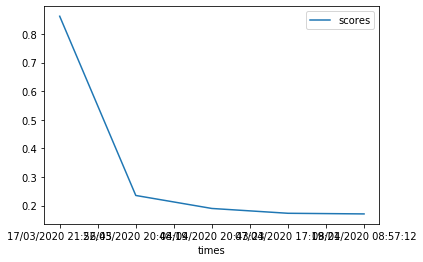

In [136]:
ax = standings.plot(
    x="times",
    y="scores"
)

In [138]:
for i, row in standings.iterrows():
    ax.annotate(
        
    )

In [129]:
import seaborn as sns

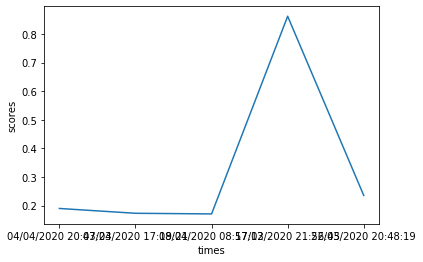

In [134]:

sns.lineplot(
    data=standings,
    x="times",
    y="scores"
)